---

title: "RFM Analysis"
format: html

---

# RFM Segmentation

---

**Outline**

1. Business Understanding
2. Modelling Workflow
3. Data Pipelines
4. EDA
5. Preprocessing
6. Clustering
7. Business Recommendation

In [114]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='red'> **1. Business Understanding** </font>
---

# <font color='Red'> **2. Modelling Workflow** </font>
---

# <font color='Red'> **3. Importing Data** </font>
---

## **Data Description**
- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
<br><br>
- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. <br><br>
- `Description`: Product (item) name. Nominal. <br><br>
- `Quantity`: The quantities of each product (item) per transaction. Numeric. <br><br>
- `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. <br><br>
- `Price`: Unit price. Numeric, Product price per unit in sterling. <br><br>
- `Customer ID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br><br>
- `Country`: Country name. Nominal, the name of the country where each customer resides. <br><br>

## **Import Data**
---

In [34]:
filepath = "data/raw/online+retail.zip"

with zipfile.ZipFile(filepath, 'r') as z:
    print(z.namelist())

['Online Retail.xlsx']


In [35]:
with zipfile.ZipFile(filepath, "r") as z:
    z.extractall("data/raw/unzipped")

In [55]:
df1 = pd.read_excel('data/raw/unzipped/Online Retail.xlsx')

In [56]:
display(df1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [57]:
filepath = "data/raw/online+retail+ii.zip"

with zipfile.ZipFile(filepath, 'r') as z:
    print(z.namelist())

['online_retail_II.xlsx']


In [58]:
with zipfile.ZipFile(filepath, "r") as z:
    z.extractall("data/raw/unzipped")

In [59]:
df2 = pd.read_excel("data/raw/unzipped/online_retail_II.xlsx")

In [60]:
display(df2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


**Check Data Type**

In [61]:
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [62]:
df1['CustomerID'] = df1['CustomerID'].astype(object)

**Check for duplicates**

In [63]:
df1[df1.duplicated(keep='first')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


- There are 5268 rows of duplicated data

In [64]:
df1.drop_duplicates(keep='first', inplace=True)

In [65]:
df1.duplicated().sum()

np.int64(0)

# <font color='red'>**4. Exploratory Data Analysis**</font>

In [72]:
eda_data = df1.copy()

# validate
print('Original data shape :', df1.shape)
print('EDA data shape      :', eda_data.shape)

Original data shape : (536641, 8)
EDA data shape      : (536641, 8)


### **4.1 Check for data descriptions**

In [73]:
eda_data.describe()

,Quantity,InvoiceDate,UnitPrice
count,536641.000000,536641,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 10:52:00,1.250000
50%,3.000000,2011-07-19 14:04:00,2.080000
75%,10.000000,2011-10-18 17:05:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.130156,NaN,97.233118


**Summary**
- The Quantity and UnitPrice minimum value are negatives
- There are potential outliers on the data

In [74]:
eda_data[eda_data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [75]:
eda_data[eda_data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


**Dropping Negative Quantity and UnitPrice**

In [76]:
print('Shape before dropping negative quantity and unitprice: ', eda_data.shape)

eda_data = eda_data[(eda_data['UnitPrice']>0) & (eda_data['Quantity']>0)]

print('Shape after dropping negative quantity and unitprice: ', eda_data.shape)

Shape before dropping negative quantity and unitprice:  (536641, 8)
Shape after dropping negative quantity and unitprice:  (524878, 8)


In [77]:
eda_data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

In [ ]:
print("Shape before dropping Nan: ", eda_data.shape)

eda_data = eda_data.dropna()

print("Shape after dropping Nan: ", eda_data.shape)

Shape sebelum drop Nan:  (524878, 8)
Shape setelah drop Nan:  (392692, 8)


In [79]:
# Validate
eda_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

###  **4.2 Checking `InvoiceNo`**

In [84]:
eda_data['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
551888      1
536400      1
536405      1
581458      1
581459      1
Name: count, Length: 18532, dtype: int64

In [90]:
eda_data[eda_data['InvoiceNo'] == 576339]['StockCode'].nunique()

541

There are 541 number of items in a single transaction in invoice 5766339.

### **4.3 Checking `CustomerID`**

In [92]:
eda_data['CustomerID'].nunique()

4338

**Summary**
- From 536641 rows of transaction, there were only 4338 number of unique customer.

### **4.4 Create RFM+T features**

**Checking last transaction date**

In [ ]:
eda_data["InvoiceDate"].min(), eda_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

**Summary**
- This dataset contains data from 1 Desember 2010 until 9 Desember 2011
- Let's take 11 Desember 2011 as the reference day.

In [105]:
ref_date = pd.to_datetime('2011-12-11')

ref_date

Timestamp('2011-12-11 00:00:00')

**Define the RFM+T function**

In [106]:
def recency(x):
    """Calculate days after customer's last transaction to the reference date
        Args:
            x(datetime): InvoiceDate
        
        Returns:
            integer: number of days """
    return (ref_date - x.max()).days

def frequency(x):
    """Calculate the number of transactions done by each customer
        Args:
            x(object): InvoiceNo
        
        Returns:
            integer: number of transactions"""
    return len(set(x))

def tenure(x):
    """Calculate the day difference between customer first and last purchase
        Args:
            x(datetime): InvoiceDate
        
        Returns:
            integer: number of days"""
    return (x.max()-x.min()).days

def generate_rfmts(data):
    """ Generate recency, frequency, monetary, tenure, and sales from data"""
    
    # Create sales feature
    data['Sales'] = data['Quantity']* data['UnitPrice']

    #Grouping by CustomerID
    agg_dict = {
        'InvoiceDate' : [recency, tenure],
        'InvoiceNo' : [frequency],
        'Sales' : 'sum'
    }
    data_rfmts = data.groupby('CustomerID').agg(agg_dict)

    #Rename columns
    data_rfmts.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    data_rfmts.index = data_rfmts.index.astype('int')

    return data_rfmts


In [107]:
rfm_data = generate_rfmts(eda_data)

In [108]:
rfm_data

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346,326,0,1,77183.60
12347,3,365,7,4310.00
12348,76,282,4,1797.24
12349,19,0,1,1757.55
12350,311,0,1,334.40
...,...,...,...,...
18280,278,0,1,180.60
18281,181,0,1,80.82
18282,8,118,2,178.05


**Checking RFM data Descriptions**

In [109]:
rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,93.059474,130.448594,4.272015,2048.688081
std,100.012264,132.039554,7.697998,8985.230220
min,1.000000,0.000000,1.000000,3.750000
25%,18.000000,0.000000,1.000000,306.482500
50%,51.000000,92.500000,2.000000,668.570000
75%,142.750000,251.750000,5.000000,1660.597500
max,374.000000,373.000000,209.000000,280206.020000


**Summary**
- There are no negative numbers in the data.
- Frequency and Monetary seems to have an outlier.


**Checking `Tenure`**

- Tenure = 0 means customer last and first purchase are on the same day.

In [104]:
rfm_data[rfm_data['Tenure'] == 0]

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12346,325,0,1,77183.60
12349,18,0,1,1757.55
12350,310,0,1,334.40
12353,204,0,1,89.00
12354,232,0,1,1079.40
...,...,...,...,...
18276,43,0,1,335.86
18277,58,0,1,110.38
18278,73,0,1,173.90


**Checking Frequency**

- check if tenure = 0 means a one time buyer

In [111]:
rfm_data[(rfm_data['Tenure'] == 0) & (rfm_data['Frequency'] > 1)]

,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12365,292,0,2,641.38
12410,309,0,2,693.33
12424,163,0,2,1760.96
12452,17,0,2,430.57
12512,67,0,2,132.18
...,...,...,...,...
18013,156,0,2,187.29
18024,153,0,2,389.78
18034,22,0,2,418.68


- not all of them are one time buyer, they do more than 1 transaction on one day.
- Our interest is to segment the repurchase customer.
- Exclude the one time buyer from the data

In [113]:
rfm_data = rfm_data[rfm_data['Frequency'] > 1]
rfm_data.describe()

,Recency,Tenure,Frequency,Monetary
count,2845.000000,2845.000000,2845.000000,2845.000000
mean,59.386292,198.905448,5.989104,2907.985706
std,70.246203,113.866961,9.044247,10899.538240
min,1.000000,0.000000,2.000000,6.900000
25%,12.000000,98.000000,2.000000,614.660000
50%,31.000000,207.000000,4.000000,1154.470000
75%,76.000000,299.000000,6.000000,2429.830000
max,374.000000,373.000000,209.000000,280206.020000


**Plotting the Distribution**

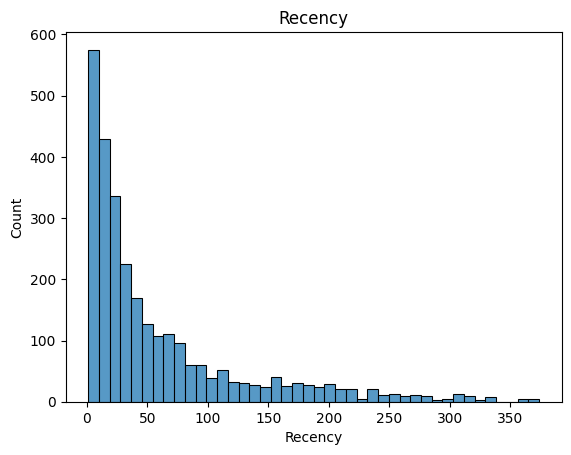

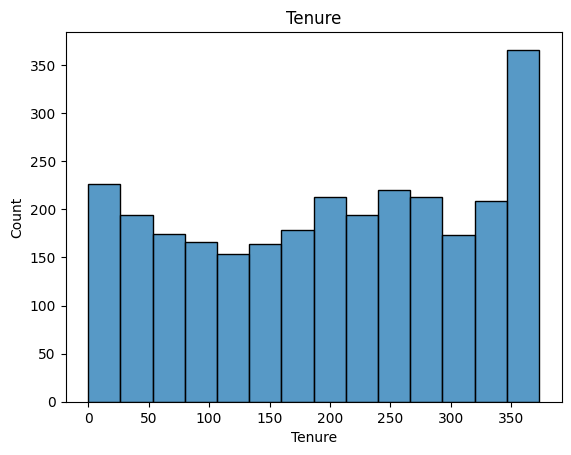

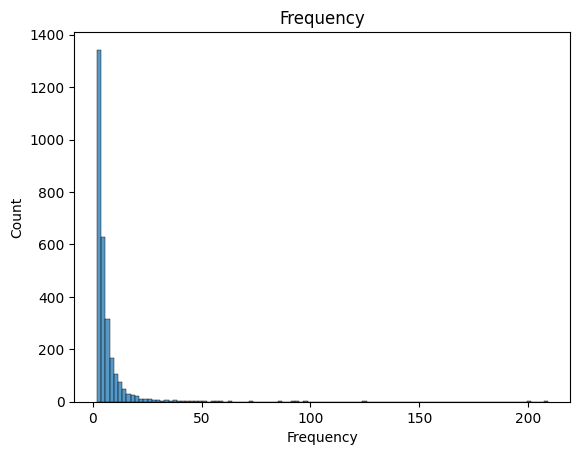

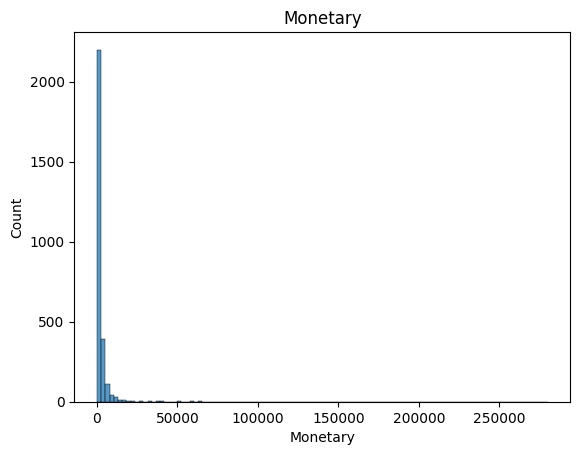

In [115]:
for col in rfm_data.columns:
    x = rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

**Summary**
- The Monetary & Frequency data is highly skewed.
- Need to drop these outliers.

**Dropping Outliers**

In [116]:
def drop_outlier(data, cols):
    """"""
    data_clean = data.copy()

    for col in cols:
        q1, q3 = np.quantile(data_clean[col], q=[0.25, 0.75])
        iqr = q3 - q1
        ub = q3 + 1.5*iqr # upper bound
        lb = q1 - 1.5*iqr # lower bound

        #Filter data
        data_clean = data_clean[(data_clean[col]>=lb) & (data_clean[col]<=ub)]

    return data_clean

In [118]:
rfm_data = drop_outlier(rfm_data, cols =['Monetary',
                                        'Frequency'])

print('rfm data shape:', rfm_data.shape)
rfm_data.describe()

rfm data shape: (2395, 4)


,Recency,Tenure,Frequency,Monetary
count,2395.000000,2395.000000,2395.000000,2395.000000
mean,66.670981,177.201670,3.768267,1251.421504
std,72.737947,107.313335,1.903081,980.459476
min,1.000000,0.000000,2.000000,6.900000
25%,16.000000,82.000000,2.000000,547.485000
50%,37.000000,182.000000,3.000000,942.340000
75%,89.000000,266.000000,5.000000,1687.945000
max,374.000000,371.000000,9.000000,5126.760000


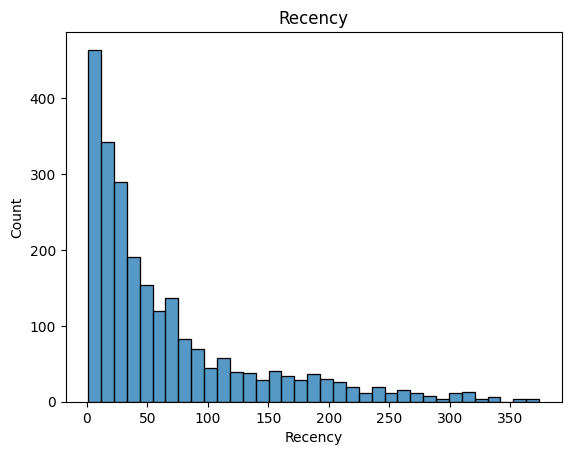

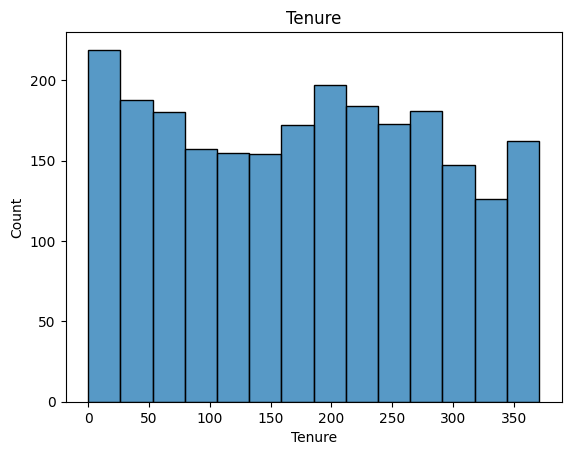

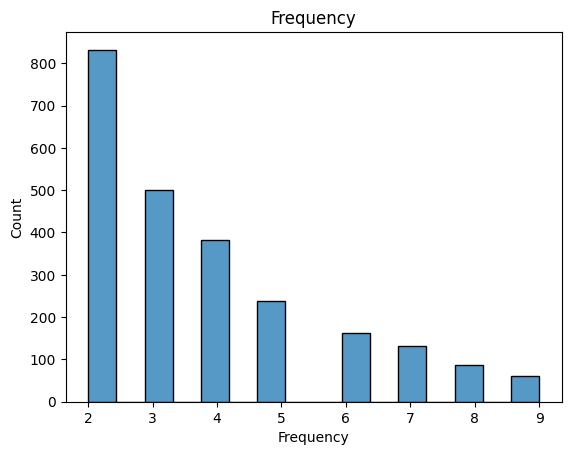

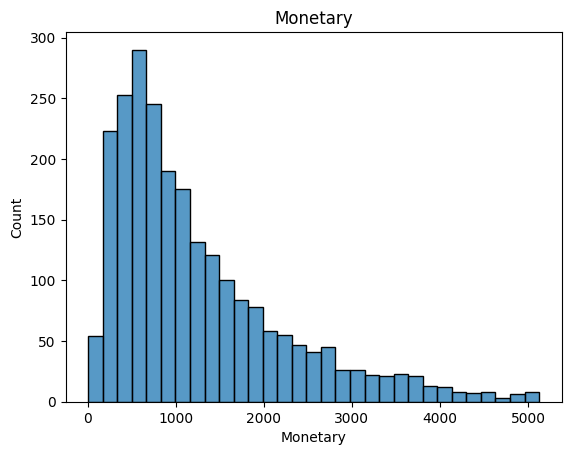

In [119]:
for col in rfm_data.columns:
    x = rfm_data[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

### **Normalizing Data**

In [124]:
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(data):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    Returns
    -------
    scaler : object
        The Min-Max scaler
    """
    # Create & fit scaler
    scaler = MinMaxScaler()
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    """
    Function to fit a min-max scaler

    Parameters
    ----------
    data : pandas DataFrame
        The sample RFM data

    scaler : object
        The Min-Max scaler

    Returns
    -------
    data_clean : object
        The clean data
    """
    # Transform scaler
    data_clean = pd.DataFrame(scaler.transform(data))
    data_clean.index = data.index
    data_clean.columns = data.columns

    # Validate
    print("Data shape :", data.shape)

    return data_clean

In [125]:
# Fit a scaler
scaler = fit_scaler(data = rfm_data)

# Transform data
data_rfm_scaled = transform_scaler(data = rfm_data,
                                   scaler = scaler)

data_rfm_scaled.head()

Data shape : (2395, 4)


,Recency,Tenure,Frequency,Monetary
CustomerID,,,,
12347,0.005362,0.983827,0.714286,0.840472
12348,0.201072,0.760108,0.285714,0.349685
12352,0.096515,0.700809,0.857143,0.488127
12356,0.058981,0.814016,0.142857,0.547775
12358,0.002681,0.401617,0.000000,0.226795


In [127]:
data_rfm_scaled.describe()

,Recency,Tenure,Frequency,Monetary
count,2395.000000,2395.000000,2395.000000,2395.000000
mean,0.176062,0.477633,0.252610,0.243077
std,0.195008,0.289254,0.271869,0.191501
min,0.000000,0.000000,0.000000,0.000000
25%,0.040214,0.221024,0.000000,0.105586
50%,0.096515,0.490566,0.142857,0.182708
75%,0.235925,0.716981,0.428571,0.328338
max,1.000000,1.000000,1.000000,1.000000


### **Create Preprocessing Pipeline**

# <font color='red'>**6. Clustering**</font>

## **6.1 Ranking Method**

In [128]:
rfm_rank = data_rfm_scaled.copy()

- Assume the company can only afford 5 marketing strategies, therefore maximum number of cluster would be 5. 
- We will rank each RFM column the data into 5 (binning).

In [130]:
def binning_rfm(df):
    """
    Function for binning the data for making ranking method

    Parameter
    ---------
    df : pandas dataframe
         dataframe input for binning method

    Return
    ------
    df : pandas dataframe
         output binned dataframe
    """
    # Calculate quantiles for each variable
    quantiles = df.quantile(q=[0.2, 0.4, 0.6, 0.8])

    # Create bins for each variable
    r_bins = [-np.inf] + list(quantiles['Recency']) + [np.inf]
    f_bins = [-np.inf] + list(quantiles['Frequency']) + [np.inf]
    m_bins = [-np.inf] + list(quantiles['Monetary']) + [np.inf]

    # Create labels for the bins
    labels = [1, 2, 3, 4, 5]

    # label for recency (lower recency, higher ranking)
    labels_r = [5, 4, 3, 2, 1]

    # Bin each variable into five groups
    df['R_Group'] = pd.cut(df['Recency'], bins=r_bins, labels=labels_r).astype(int)
    df['F_Group'] = pd.cut(df['Frequency'], bins=f_bins, labels=labels).astype(int)
    df['M_Group'] = pd.cut(df['Monetary'], bins=m_bins, labels=labels).astype(int)

    # RFM score with average
    df['RFM_Score'] = np.round((df['R_Group']+df['F_Group']+df['M_Group'])/3,2)

    return df

In [131]:
rfm_rank = binning_rfm(rfm_rank)

In [132]:
rfm_rank.head()

,Recency,Tenure,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
CustomerID,,,,,,,,
12347,0.005362,0.983827,0.714286,0.840472,5,5,5,5.00
12348,0.201072,0.760108,0.285714,0.349685,2,3,4,3.00
12352,0.096515,0.700809,0.857143,0.488127,3,5,5,4.33
12356,0.058981,0.814016,0.142857,0.547775,4,2,5,3.67
12358,0.002681,0.401617,0.000000,0.226795,5,1,3,3.00


In [133]:
rfm_rank.dtypes

Recency      float64
Tenure       float64
Frequency    float64
Monetary     float64
R_Group        int64
F_Group        int64
M_Group        int64
RFM_Score    float64
dtype: object